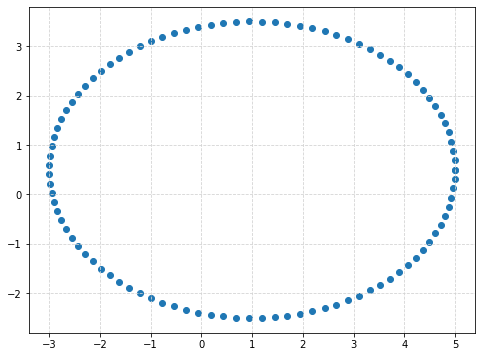

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=4.     #radius on the x-axis
b=3    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.figure(figsize=(8,6))
x =  u+a*np.cos(t)
y =  v+b*np.sin(t)
plt.scatter( x , y )
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [2]:
x_noise = x + np.random.normal(0, 0.05, 100)
y_noise = y + np.random.normal(0, 0.05, 100)

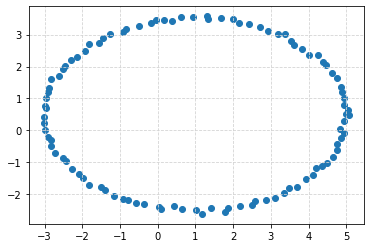

In [3]:
plt.scatter( x_noise , y_noise )
plt.grid(color='lightgray',linestyle='--')
plt.show()

In [4]:
from math import pi, cos, sin
num_samples = 25000
xc_range = np.linspace(-1.5, 1.5, 50)       #x-position of the center
yc_range = np.linspace(-1.5, 1.5, 50)    #y-position of the center
xr_range = np.linspace(1., 8., 100)      #radius on the x-axis
yr_range = np.linspace(1., 8., 100)      #radius on the y-axis
t_rot_range = np.linspace(-0.25, 0.25, 100) #rotation angle
t = np.linspace(0, 2*pi, 100)
samples  = np.zeros(shape=(num_samples, 2, 100))
print(samples.shape)
for j in range(num_samples):
#     print(i)
    u=np.random.choice(xc_range, replace=False)     #x-position of the center
    v=np.random.choice(yc_range, replace=False)    #y-position of the center
    a=np.random.choice(xr_range, replace=False)     #radius on the x-axis
    b=np.random.choice(yr_range, replace=False)    #radius on the y-axis
    t_rot = np.random.choice(t_rot_range) * pi
#     print(u, v, a, b, t_rot)
    
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
         #u,v removed to keep the same center location
    R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

    Ell_rot[0,:] += (u + np.random.normal(0, 0.05, 100))
    Ell_rot[1,:] += (v + np.random.normal(0, 0.05, 100))


    samples[j] = Ell_rot




(25000, 2, 100)


In [5]:
samples.shape

(25000, 2, 100)

In [6]:
samples[5, 1, :].shape

(100,)

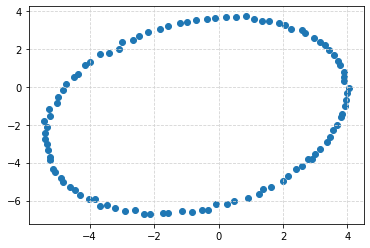

In [9]:
# plt.plot( u+Ell[0,:] , v+Ell[1,:] )     #initial ellipse
plt.scatter( samples[1080, 0, :] , samples[1080, 1,:] )    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.show()

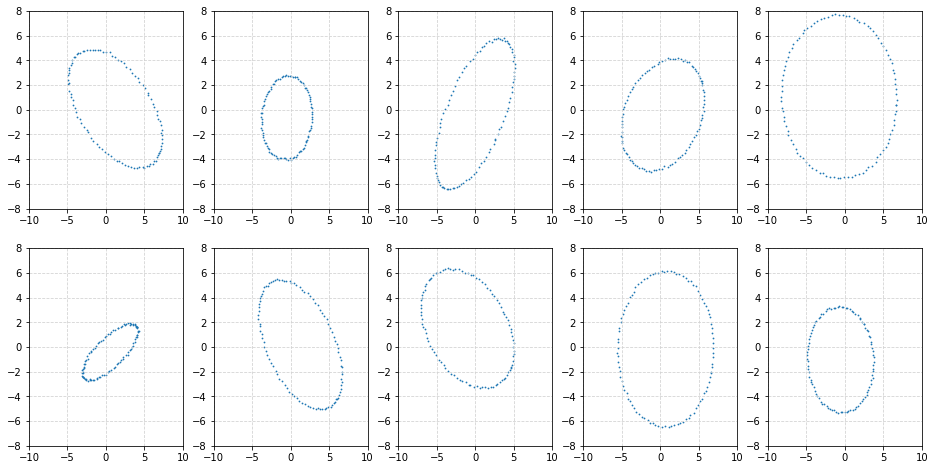

In [10]:
fig, axes = plt.subplots(2,5, figsize=(16, 8))
for i in range(0, 10, 1):
    ax = axes[(i-0)//5, i%5]
    ax.set_xlim(-10,10)
    ax.set_ylim(-8,8)
    ax.scatter(samples[i, 0, :] , samples[i, 1,:], s=0.6)
    ax.grid(color='lightgray',linestyle='--')
plt.show()

In [11]:
test_data = samples.copy()

In [12]:
test_data.shape

(25000, 2, 100)

In [13]:
for data in test_data:
#     print(data.shape)
    replace_idx = np.random.randint(data.shape[1], size=10)
#     print(replace_idx)
    replace_x = np.random.uniform(-10, 10, size=10)
    replace_y = np.random.uniform(-10, 10, size=10)
#     print(replace_int)
#     print(replace_x, replace_y)
    data[0][replace_idx] = replace_x
    data[1][replace_idx] = replace_y
#     for idx in replace_idx:
#         data[0][idx] = 
    
#     break

In [14]:
test_data[0][0]

array([ 6.96113167,  7.02415792,  7.1001122 ,  7.1971087 ,  7.2400585 ,
        7.24183088,  7.31467006,  7.19168556, -0.34624984,  7.12913104,
        7.03024609,  6.8250767 ,  6.62936344,  6.58989477,  6.27673043,
        9.28498078,  5.85173066,  5.51982474,  5.45949214,  5.09793742,
        4.78320981,  4.35073734,  4.12740341,  3.79555884,  3.44708568,
        3.07394297,  2.66464121,  2.38189281,  3.01607703,  1.59663551,
        1.20128791,  0.84824974,  0.47417213,  0.02238545, -0.31480719,
       -0.77860734, -1.06054592, -1.38709238, -1.69270184, -2.0426629 ,
       -2.48930229, -2.81729595, -2.98765008, -3.31830823, -9.72705494,
       -3.74874047, -3.99124042, -4.20770274, -4.34407495, -4.41778531,
       -4.59726455, -4.76677974, -4.85034427, -4.84662229, -4.93337773,
       -4.87897096, -4.82176127, -4.88245244, -4.82415336, -2.48841725,
       -4.4870416 , -4.30582073, -4.29298601, -4.0497136 , -3.91000618,
       -3.6926419 , -3.3665146 , -3.1857146 , -2.82007214,  6.98

In [18]:
np.where(samples[3][1] != test_data[3][1])

(array([10, 16, 18, 28, 38, 39, 52, 54, 92, 95]),)

In [14]:
diff = np.where(samples[3][0] != test_data[3][0])

In [15]:
samples[3][0][diff]

array([ 2.73787897,  4.08723218,  4.2339614 ,  4.20787479,  4.21959933,
        2.56855491,  1.75391181, -0.49349469,  0.45637237,  2.06110592])

In [16]:
test_data[3][0][diff]

array([-0.63907776, -7.02549538, -7.90276667,  2.84000562, -4.96384096,
        0.22573026,  2.82820699, -3.53656713, -0.26281805, -8.50437836])

In [17]:
test_data[3][1][diff]

array([ 1.56465986,  1.71832606,  7.15723658,  7.74814239, -2.10618733,
        6.61618887,  5.99738143, -0.67842972,  9.82820035,  9.69016328])

In [18]:
np.random.uniform(-10, 10, size=10)

array([ 4.98492793,  1.77531016,  0.47821999, -8.27223124,  5.82121605,
        5.97442319,  8.83903553,  6.21618381,  8.26052146, -5.50228606])

In [19]:
np.random.randint(data.shape[1], size=10)

array([41, 85, 56, 89, 45, 97, 12, 98, 11, 89])

In [20]:
print(samples[1][0][:5], samples[1][1][:5])

[4.29257213 4.22837439 4.15166444 4.14020194 4.13440304] [-1.1643466  -0.84318359 -0.51915671 -0.18359881  0.11272129]


In [21]:
print(test_data[1][0][:5], test_data[1][1][:5])

[4.29257213 4.22837439 4.15166444 4.14020194 4.13440304] [-1.1643466  -0.84318359 -0.51915671 -0.18359881  0.11272129]


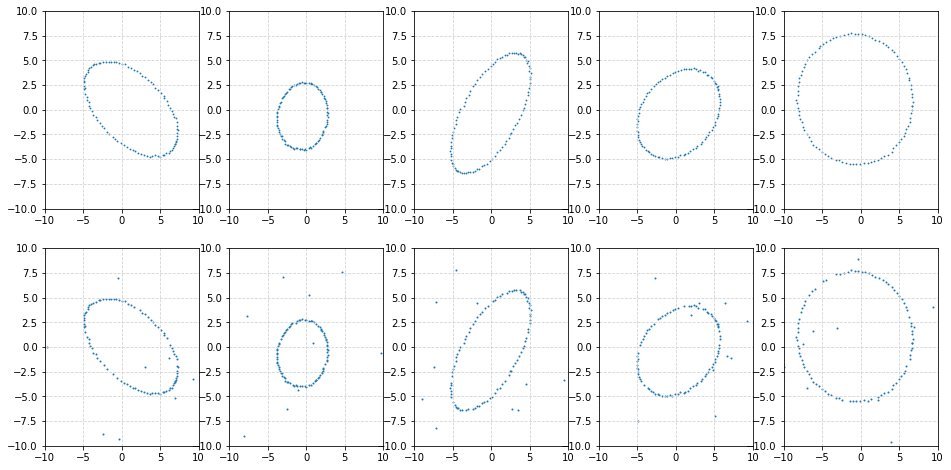

In [19]:
fig, axes = plt.subplots(2,5, figsize=(16, 8))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    if i//5 == 0:
        ax.scatter(samples[i, 0, :] , samples[i, 1,:], s=0.7)
    else:
        ax.scatter(test_data[i%5, 0, :] , test_data[i%5, 1,:], s=1.0)
    ax.grid(color='lightgray',linestyle='--')
plt.show()

In [20]:
test_data.shape

(25000, 2, 100)

In [21]:
np.save('ground_truth', samples)

In [22]:
np.save('with_errors', test_data)